# Revenue Prediction - EDA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_data_1.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
df.shape

(2240, 28)

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

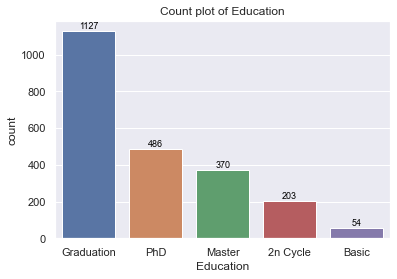

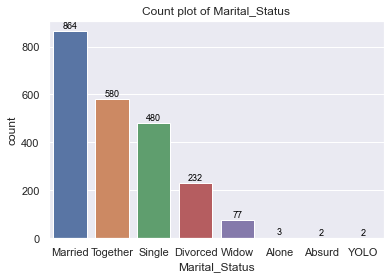

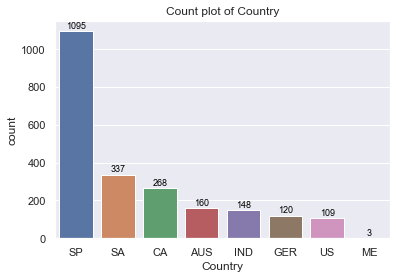

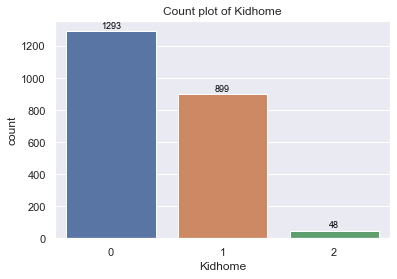

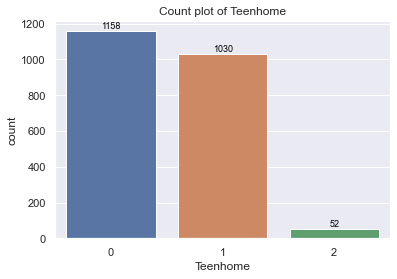

In [8]:
cat_cols = ['Education', 'Marital_Status', 'Country', 'Kidhome', 'Teenhome',]

for i in cat_cols:
    df[i] = df[i].astype('category')

for i in cat_cols:    
    value_counts_order = df[i].value_counts().index
    plt.title(f'Count plot of {i}')
    ax = sns.countplot(x=df[i], order=value_counts_order)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.xlabel(i)
    plt.show()

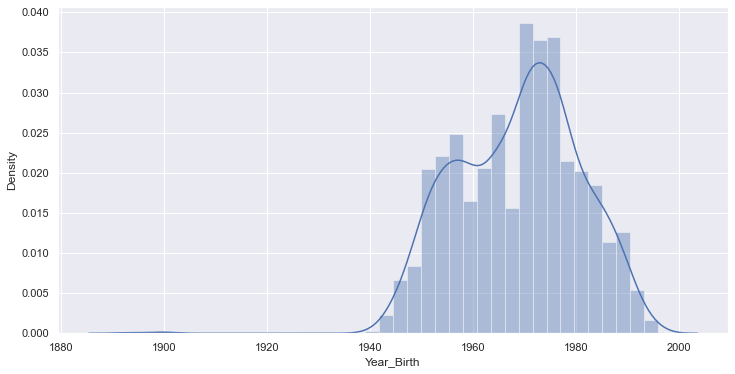

In [9]:
plt.figure(figsize=(12,6))
sns.distplot(df['Year_Birth']); plt.show()

## Target:

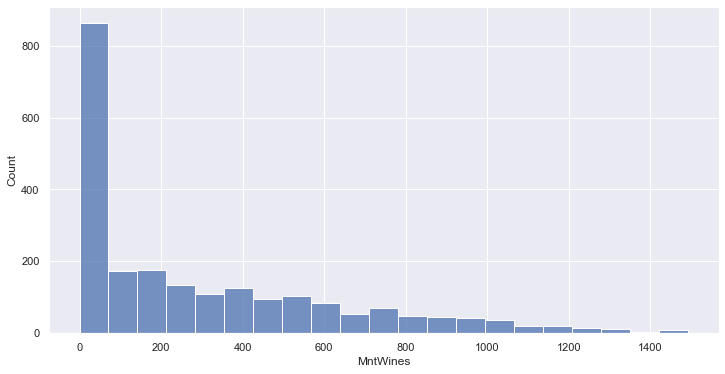

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(x = df['MntWines'], data = df ); plt.show()

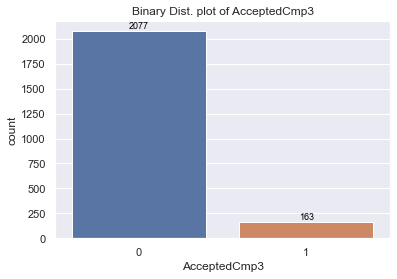

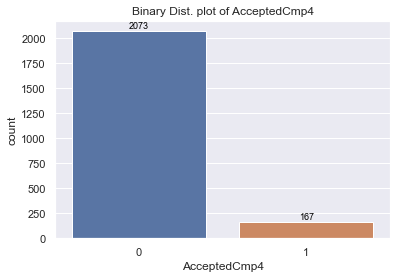

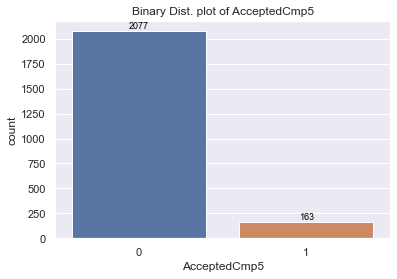

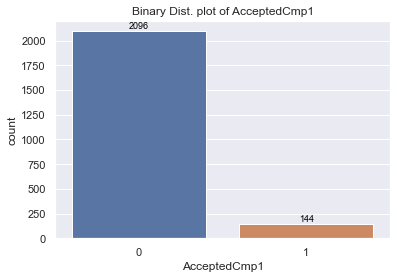

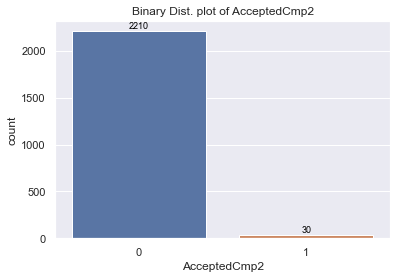

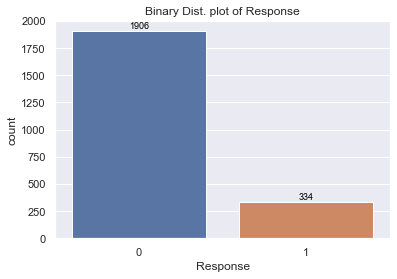

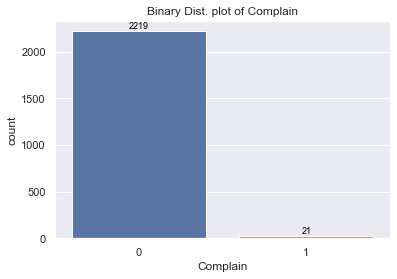

In [11]:
Binary_cols = ['AcceptedCmp3', 'AcceptedCmp4' ,'AcceptedCmp5' ,'AcceptedCmp1' ,'AcceptedCmp2' ,'Response','Complain']

for i in Binary_cols:
    df[i] = df[i].astype('category')

for i in Binary_cols:
    ax = sns.countplot(df[i])
    plt.title(f'Binary Dist. plot of {i}')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.xlabel(i)
    plt.show()

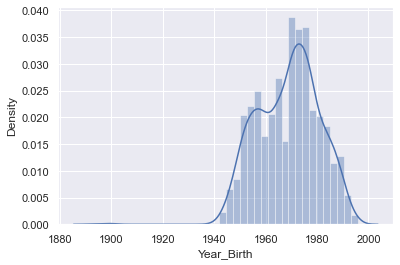

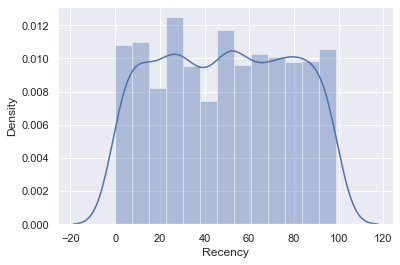

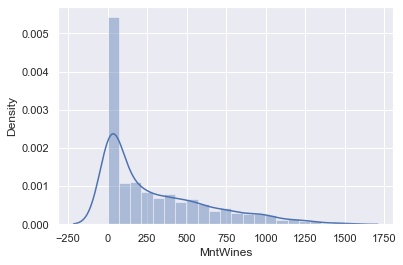

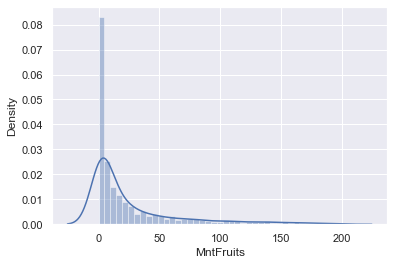

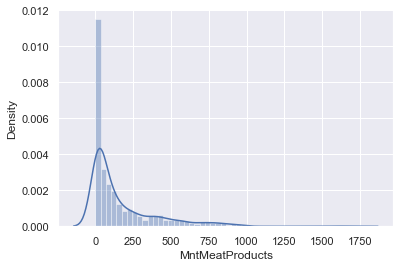

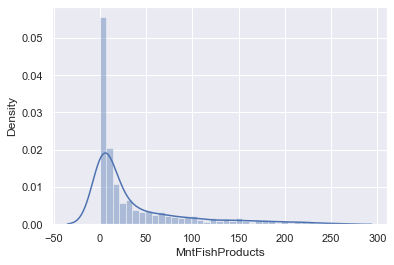

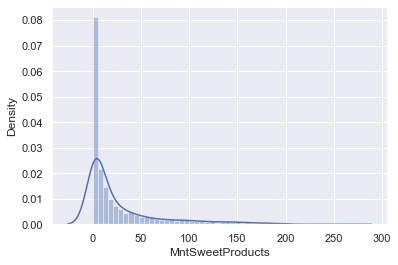

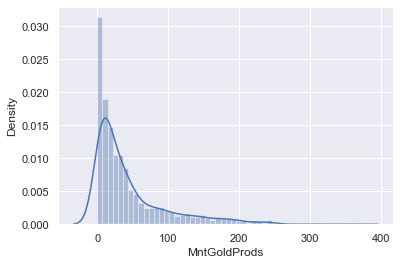

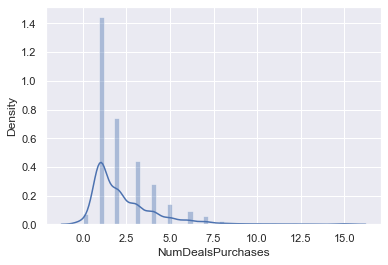

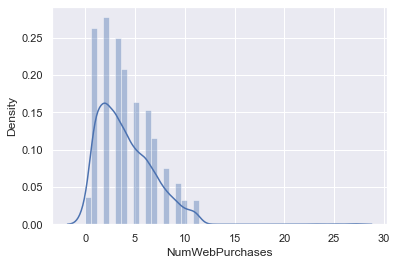

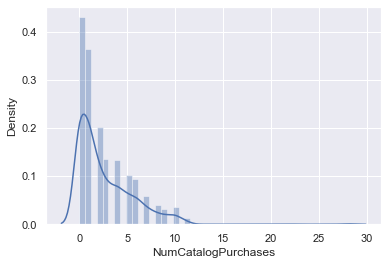

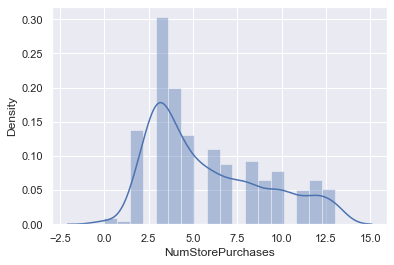

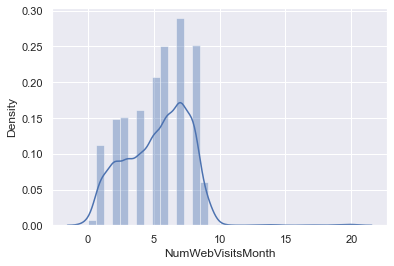

In [12]:
num_col = [i for i in df.columns if df[i].dtype == 'int64' and i!= 'ID']
for i in num_col:
    sns.distplot(x = df[i]);plt.xlabel(f'{i}');
    plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


<AxesSubplot:xlabel='Recency'>

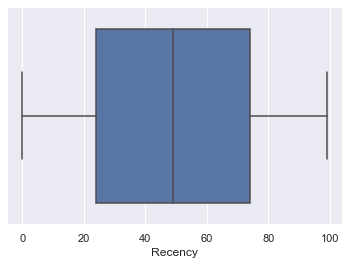

In [13]:
print(df['Recency'].unique())
sns.boxplot(df['Recency'])

In [14]:
df.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,25037.797168,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


## Bivarient 

In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

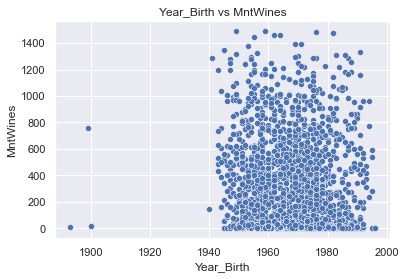

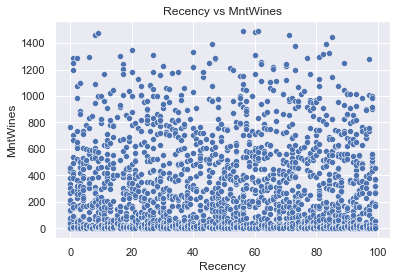

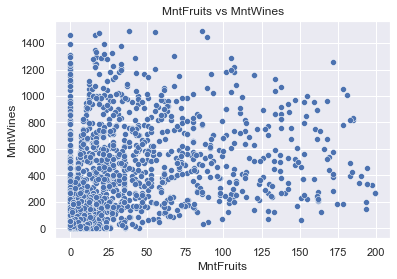

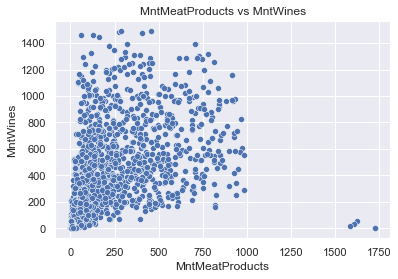

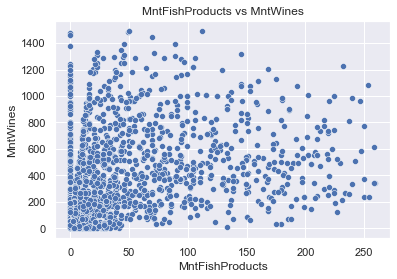

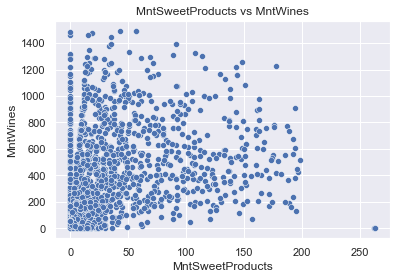

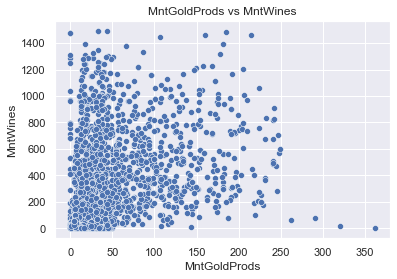

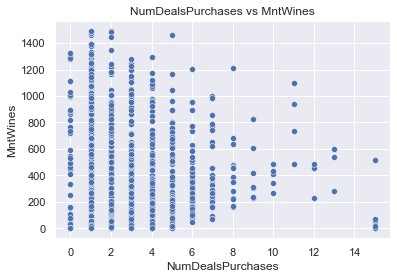

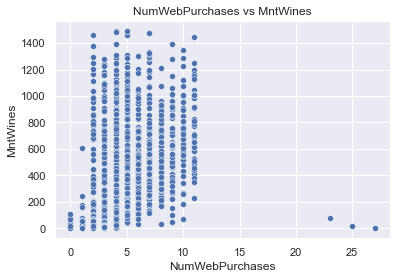

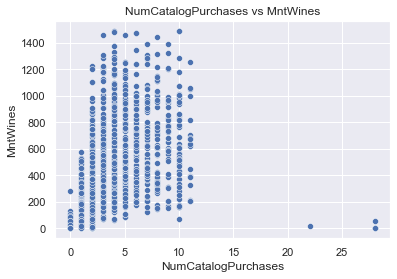

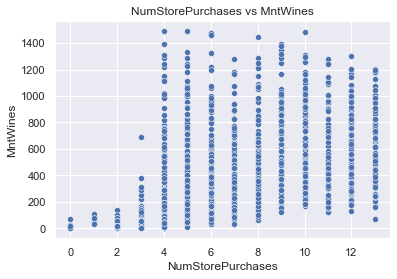

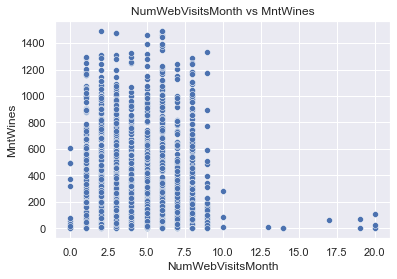

In [16]:
for col in num_col:
    if col != 'MntWines':  # Exclude the target variable
        sns.scatterplot(x=col, y='MntWines', data=df)
        plt.xlabel(col)
        plt.ylabel('MntWines')
        plt.title(f'{col} vs MntWines')
        plt.show()

## Multivarient 

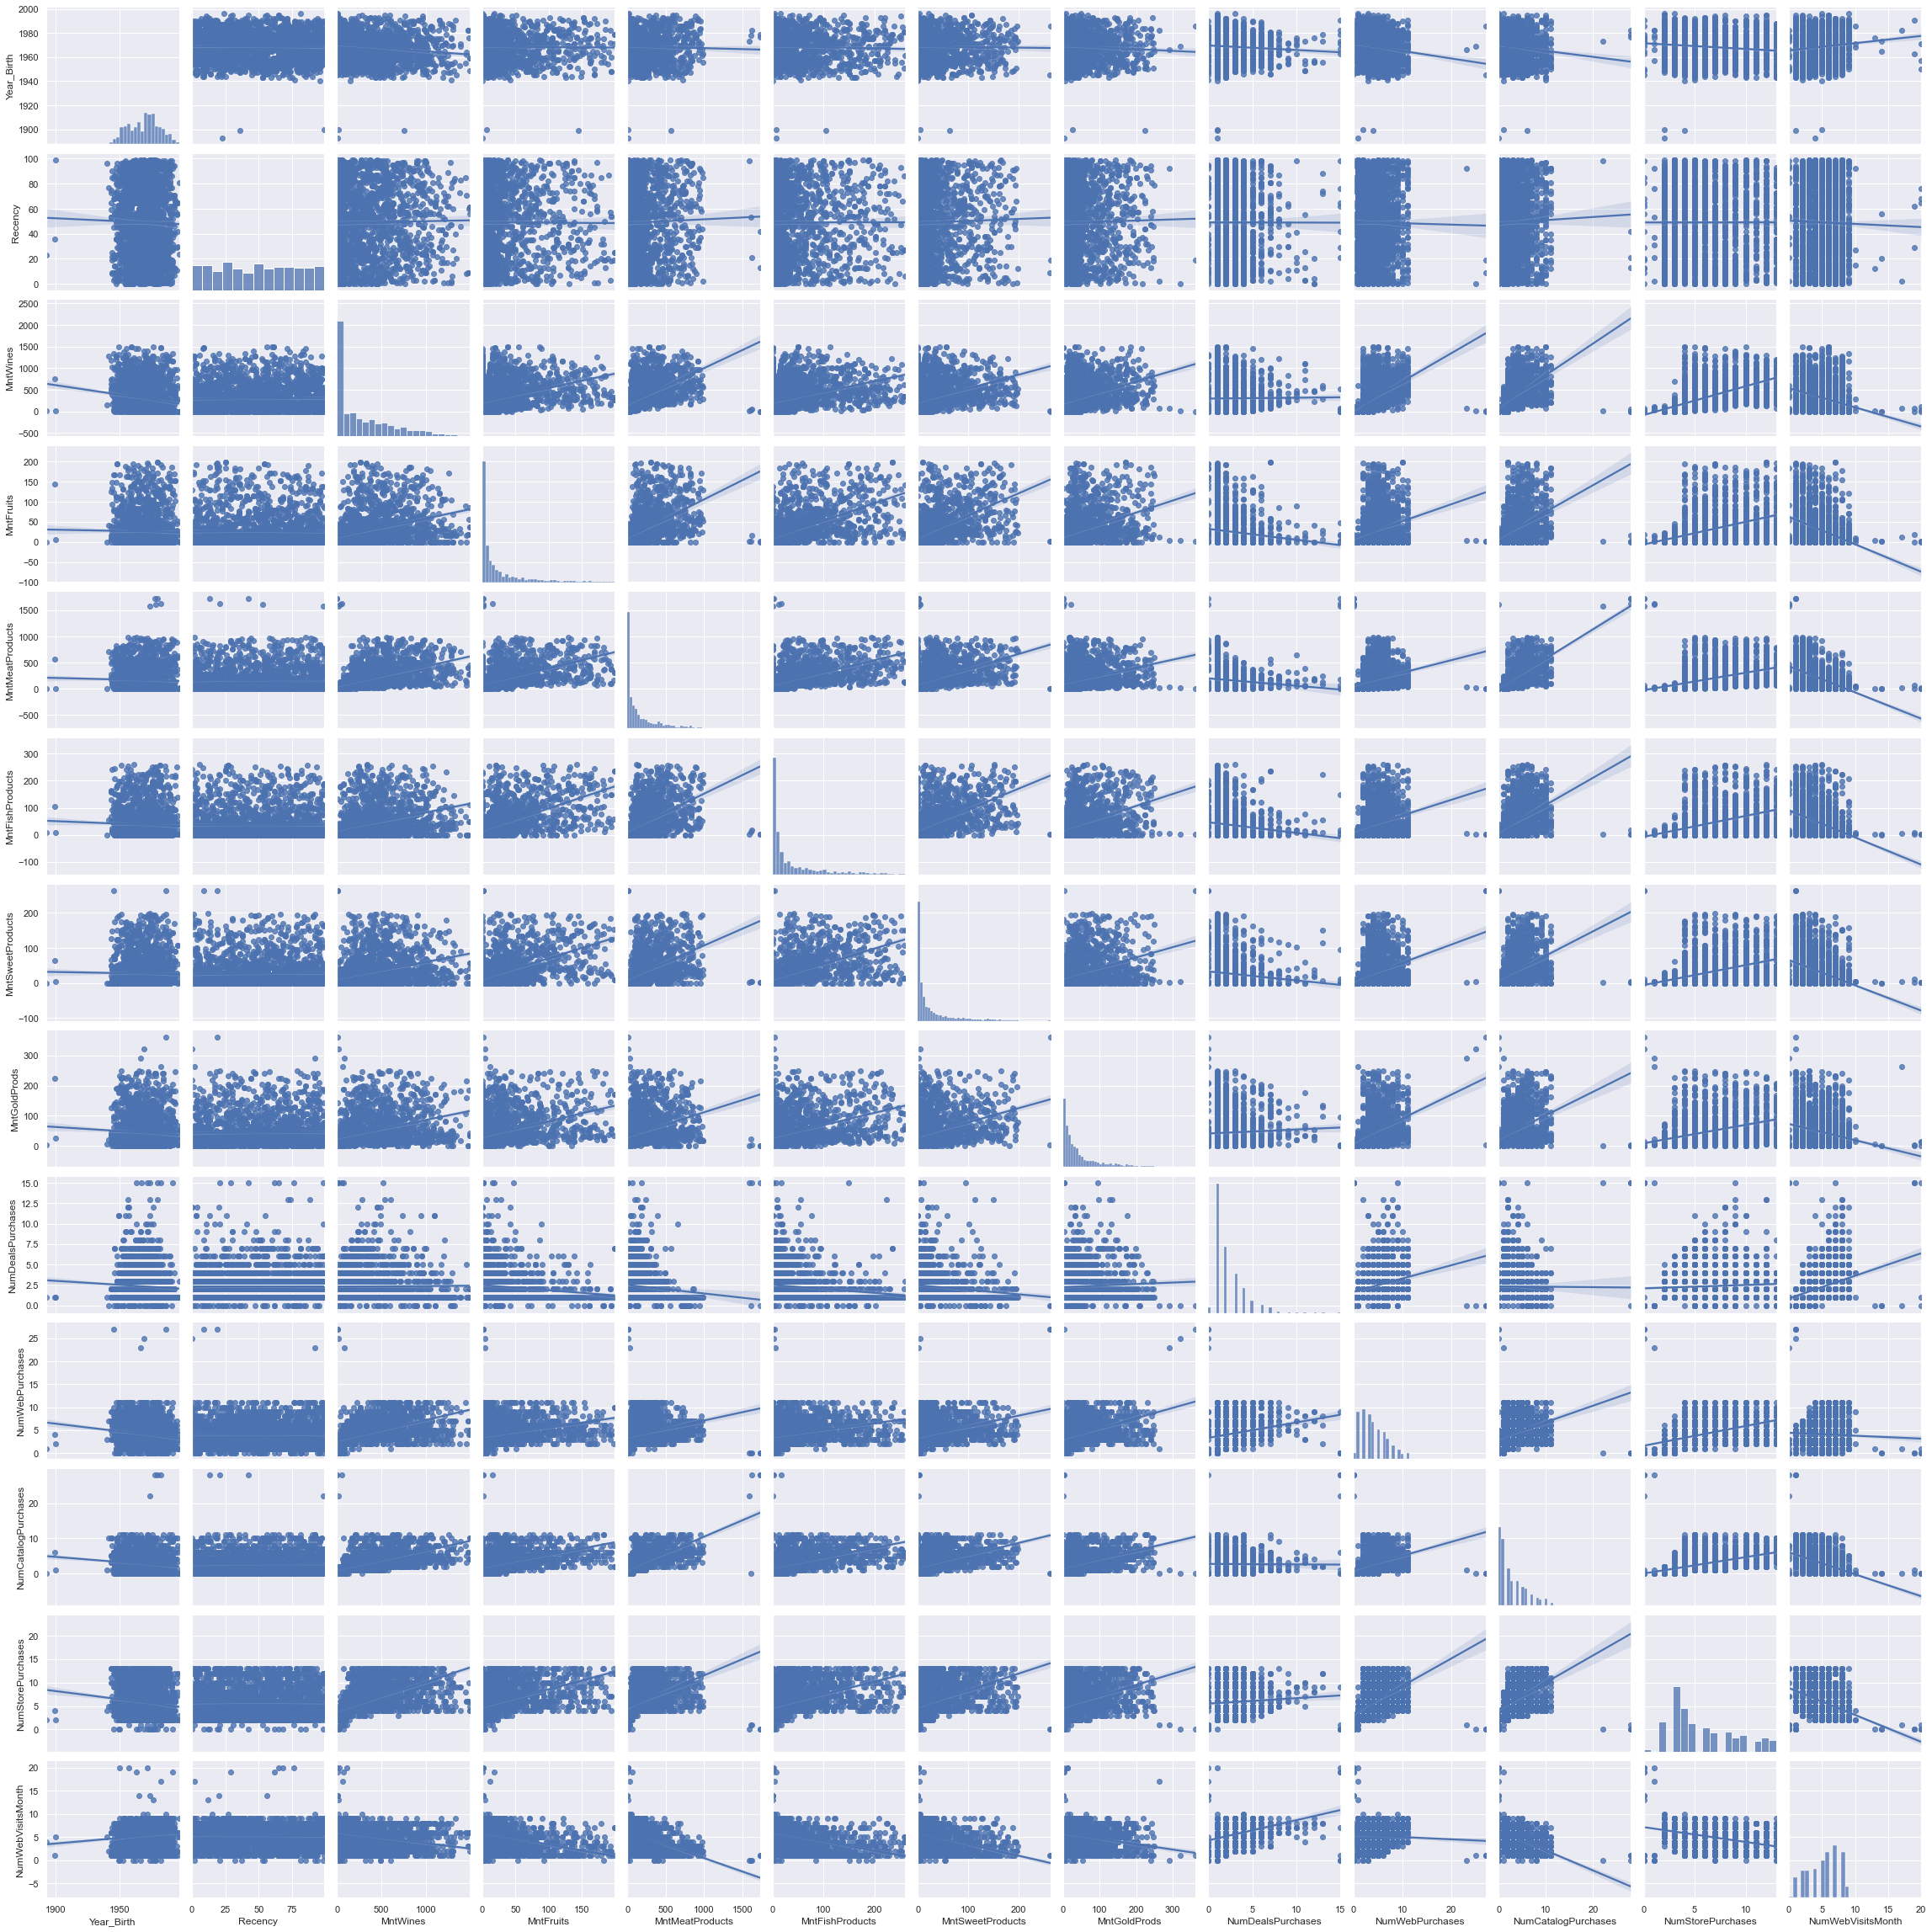

In [17]:
sns.pairplot(df[num_col],kind = 'reg')

<AxesSubplot:>

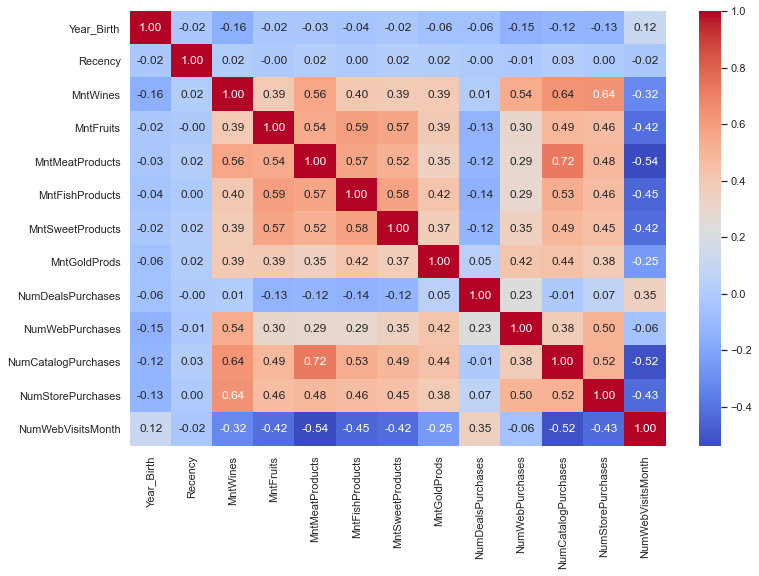

In [18]:
# Calculate the correlation matrix

correlation_matrix = df[num_col].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Moderate Correlation (0.2 to 0.5 or -0.2 to -0.5): Features with correlations in this range have a moderate linear relationship.

Important Features: Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'],
      dtype='object')


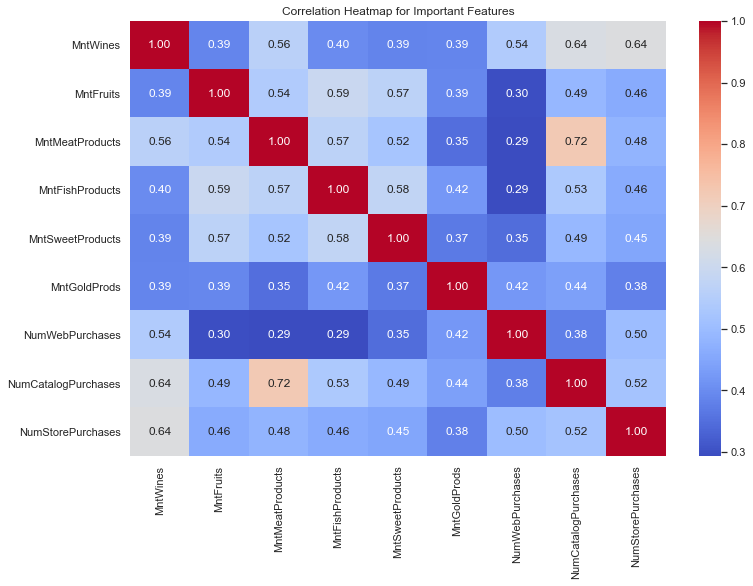

In [19]:
correlation_matrix = df[num_col].corr()
# Set a correlation threshold
correlation_threshold = 0.35  

# Identify features with correlations above the threshold
important_features = correlation_matrix['MntWines'][abs(correlation_matrix['MntWines']) > correlation_threshold].index

# Print and visualize the important features
print("Important Features:", important_features)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap for important features
sns.heatmap(correlation_matrix.loc[important_features, important_features],
            annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title('Correlation Heatmap for Important Features')
plt.show()

In [20]:
important_num_features =  list(important_features)
important_num_features

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [21]:
important_features = important_num_features + cat_cols + Binary_cols
important_features

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'Education',
 'Marital_Status',
 'Country',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain']

In [22]:
data = df[important_features].copy()
data.to_csv('Data.csv',index=False)
data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Education,...,Country,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,189,104,379,111,189,218,4,4,6,Graduation,...,SP,0,0,0,0,0,0,0,1,0
1,464,5,64,7,0,37,7,3,7,Graduation,...,CA,0,0,0,0,0,0,1,1,0
2,134,11,59,15,2,30,3,2,5,Graduation,...,US,0,1,0,0,0,0,0,0,0
3,10,0,1,0,0,0,1,0,2,Graduation,...,AUS,1,1,0,0,0,0,0,0,0
4,6,16,24,11,0,34,3,1,2,Graduation,...,SP,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,372,18,126,47,48,78,5,2,11,PhD,...,US,0,1,0,0,0,0,0,0,0
2236,5,10,13,3,8,16,1,0,3,2n Cycle,...,SP,1,0,0,0,0,0,0,0,0
2237,185,2,88,15,5,14,6,1,5,Graduation,...,SP,1,0,0,0,0,0,0,0,0
2238,267,38,701,149,165,63,5,4,10,Graduation,...,IND,0,0,0,0,0,0,0,0,0
